In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
from matplotlib.lines import Line2D
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
test_scores = pd.read_csv("Test scores.csv", parse_dates=['Test taken date'])
test_master = pd.read_csv("Test master.csv")
test_participant = pd.read_csv("Audience summary.csv")

In [3]:
test_scores['weekday_name']  = test_scores['Test taken date'].dt.weekday_name
test_scores['month']  = test_scores['Test taken date'].dt.month_name() 
test_scores['week']  = test_scores['Test taken date'].dt.week-42 # to get number from 1 
test_master['maximum_score'] = test_master['No. of questions'] * test_master['Marks per question']

In [4]:
test_scores = pd.merge(test_scores,test_master,left_on="Test Name", right_on="Test name", how = "left")

In [5]:
cols = ['Participant identifier', 'Test Name', 'Track','Designation', 'Score', 'Test taken date',
        'weekday_name', 'month', 'week','Complexity', 'maximum_score']
test_scores = test_scores[cols]

In [6]:
test_scores['Percent'] = round((test_scores['Score']/test_scores['maximum_score'])*100,2)

Text(0.5, 0.94, 'Heatmap shwoing average percentage score across each test by track')

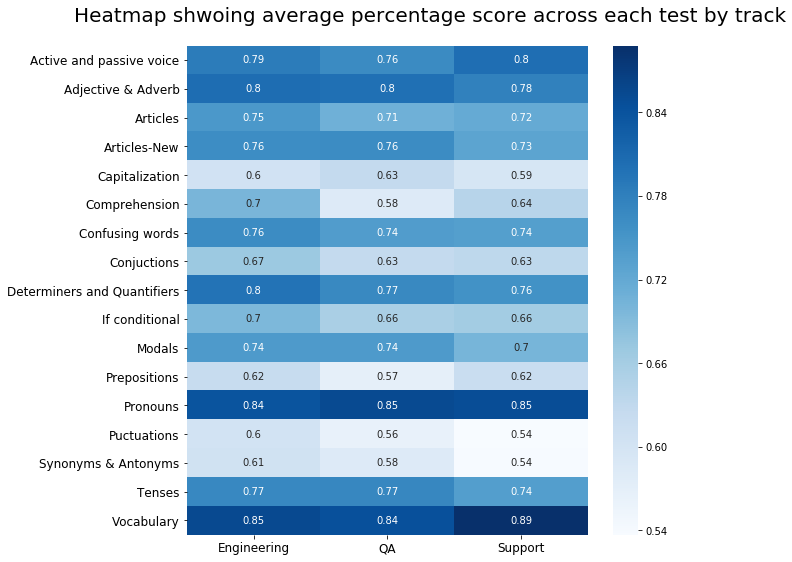

In [7]:
test_scores_TestName2 = test_scores.groupby(['Test Name','Track'])[['Score','maximum_score']].mean().reset_index().sort_values(
                                                                                                    by=['maximum_score','Score'])
test_scores_TestName2['Percent'] = test_scores_TestName2['Score']/test_scores_TestName2['maximum_score']
df_heatmap = test_scores_TestName2.pivot('Test Name','Track','Percent')
fig, axes = plt.subplots(figsize=(9,9))
f = sns.heatmap(df_heatmap, annot=True,cmap ="Blues")
f.set_xlabel(xlabel = '',fontsize=20)
f.set_ylabel(ylabel = '',fontsize=20)
f.set_yticklabels(labels = list(df_heatmap.index.values), fontsize=12, rotation = 360)
f.set_xticklabels(labels = ['Engineering', 'QA', 'Support'], fontsize=12, rotation =360)
fig.suptitle('Heatmap shwoing average percentage score across each test by track', 
             fontsize=20, x = 0.5, y = 0.94)
#plb.savefig('Heat_Track',dpi=100,bbox_inches='tight')

Text(0.5, 0.94, 'Heatmap shwoing average percentage score across each test by designation')

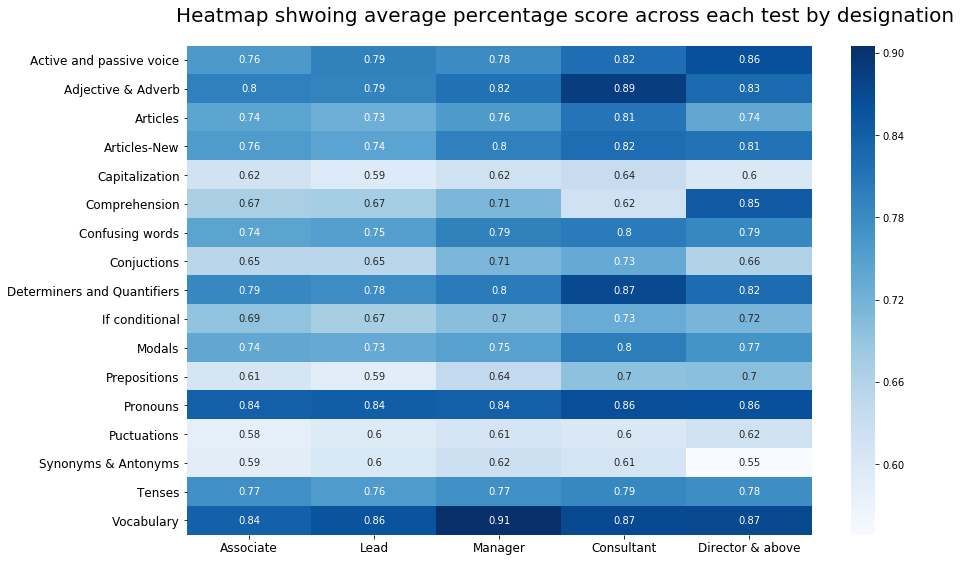

In [8]:
test_scores_TestName2 = test_scores.groupby(['Test Name','Designation'])[['Score','maximum_score']].mean().reset_index().sort_values(
                                                                                                    by=['maximum_score','Score'])
test_scores_TestName2['Percent'] = test_scores_TestName2['Score']/test_scores_TestName2['maximum_score']
df_heatmap = test_scores_TestName2.pivot('Test Name','Designation','Percent')
df_heatmap = df_heatmap[['Associate',  'Lead','Manager','Consultant','Associate Director and above']]
fig, axes = plt.subplots(figsize=(14,9))
f = sns.heatmap(df_heatmap, annot=True,cmap ="Blues")
f.set_xlabel(xlabel = '',fontsize=20)
f.set_ylabel(ylabel = '',fontsize=20)
f.set_yticklabels(labels = list(df_heatmap.index.values), fontsize=12, rotation = 360)
f.set_xticklabels(labels = ['Associate',  'Lead','Manager','Consultant','Director & above'], fontsize=12, rotation =360)
fig.suptitle('Heatmap shwoing average percentage score across each test by designation', 
             fontsize=20, x = 0.5, y = 0.94)
#plb.savefig('Heat_Design',dpi=100,bbox_inches='tight')

In [9]:
#test_names

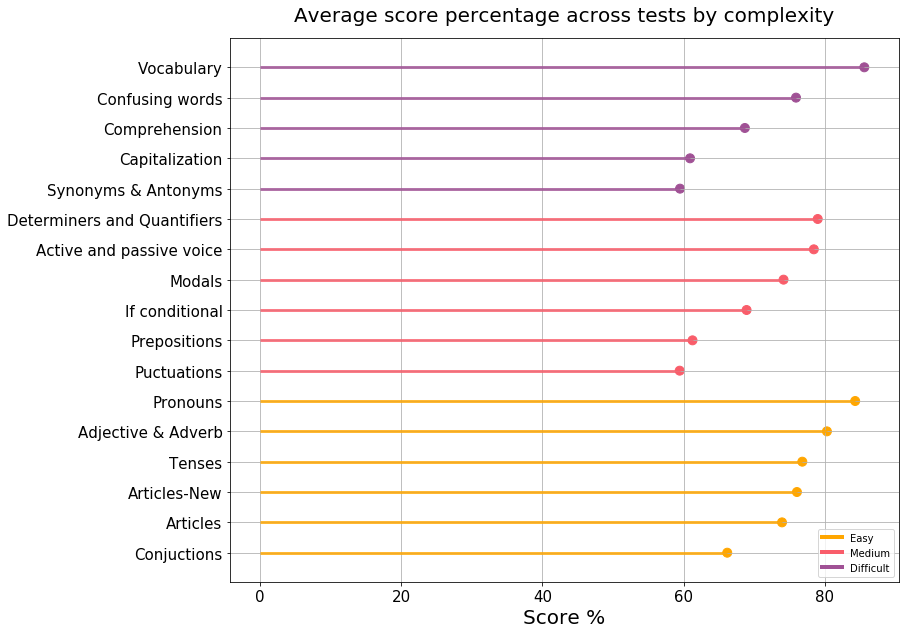

In [10]:
fig = plt.figure(figsize=(12,10))
test_names = test_scores.groupby(['Test Name', 'Complexity'])['Percent'].mean().reset_index()
list_ordering = ['Easy','Medium','Difficult']  
test_names['Complexity'] = test_names['Complexity'] .astype("category", categories=list_ordering, ordered=True)
test_names = test_names.sort_values(['Complexity', 'Percent'])
my_range=range(0,len(test_names))
my_color=np.where(test_names['Complexity']=='Easy',"#ffa600",
                  np.where(test_names['Complexity']=='Medium',"#f95d6a","#a05195"))

plt.hlines(y=test_names['Test Name'], xmin=0, xmax=test_names['Percent'], color=my_color,linewidth=3, alpha =0.8)
plt.scatter(test_names['Percent'], my_range, color=my_color, s=80, alpha=1)
plt.title("Average score percentage across tests by complexity", fontsize=20, x=0.5,y=1.02)
plt.xlabel('Score %', fontsize=20)
plt.ylabel('',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.grid()
custom_lines = [Line2D([0], [0], color="#ffa600", lw=4),
                Line2D([0], [0], color="#f95d6a", lw=4),
                Line2D([0], [0], color="#a05195", lw=4)]
plt.legend(custom_lines, ['Easy', 'Medium', 'Difficult'], loc='lower right')
#plb.savefig('Lollipo_Score',dpi=100,bbox_inches='tight')

In [11]:
#test_names

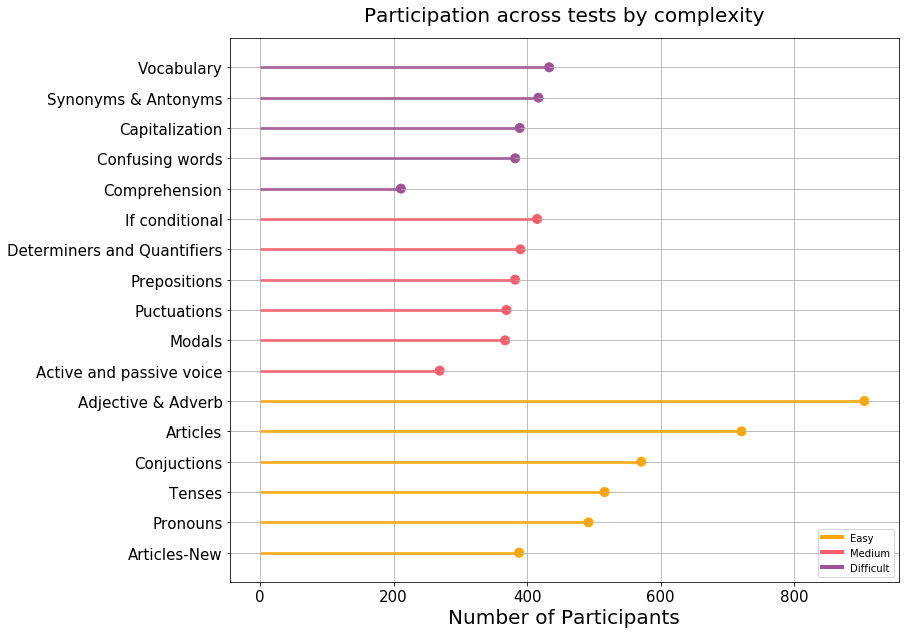

In [12]:
fig = plt.figure(figsize=(12,10))
test_names = test_scores.groupby(['Test Name', 'Complexity'])['Participant identifier'].size().reset_index()
list_ordering = ['Easy','Medium','Difficult']  
test_names['Complexity'] = test_names['Complexity'] .astype("category", categories=list_ordering, ordered=True)
test_names = test_names.sort_values(['Complexity', 'Participant identifier'])
my_range=range(0,len(test_names))
my_color=np.where(test_names['Complexity']=='Easy',"#ffa600",
                  np.where(test_names['Complexity']=='Medium',"#f95d6a","#a05195"))

plt.hlines(y=test_names['Test Name'], xmin=0, xmax=test_names['Participant identifier'], color=my_color,linewidth=3, alpha =0.8)
plt.scatter(test_names['Participant identifier'], my_range, color=my_color, s=80, alpha=1)
plt.title("Participation across tests by complexity", fontsize=20, x=0.5,y=1.02)
plt.xlabel('Number of Participants', fontsize=20)
plt.ylabel('',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.grid()
custom_lines = [Line2D([0], [0], color="#ffa600", lw=4),
                Line2D([0], [0], color="#f95d6a", lw=4),
                Line2D([0], [0], color="#a05195", lw=4)]
plt.legend(custom_lines, ['Easy', 'Medium', 'Difficult'], loc='lower right')
#plb.savefig('Lollipo_Part',dpi=100,bbox_inches='tight')

In [13]:
#max_score

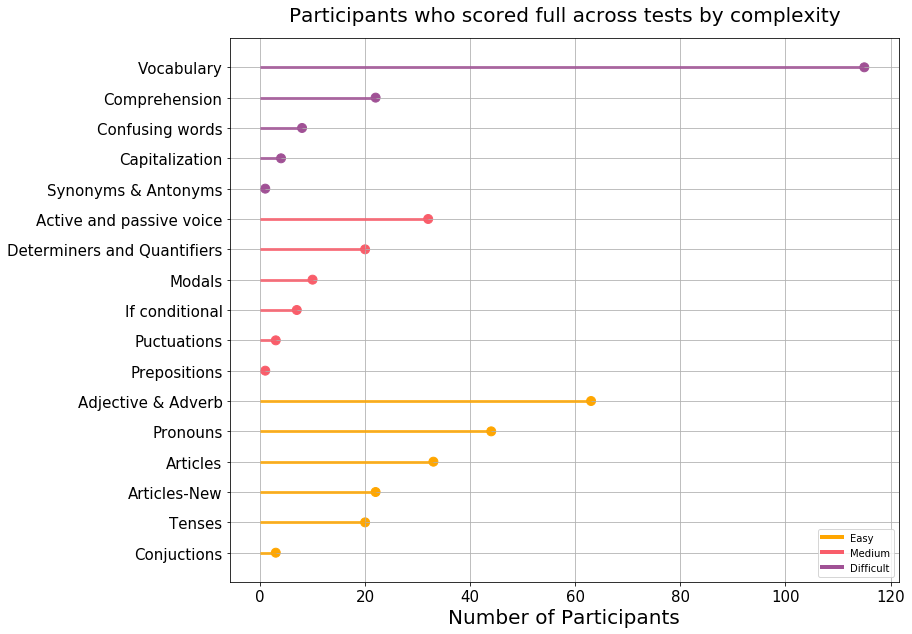

In [14]:
max_score = test_scores[test_scores['Percent'] == 100]
max_score = max_score.groupby(['Test Name', 'Complexity'])['Participant identifier'].size().reset_index()

fig = plt.figure(figsize=(12,10))
list_ordering = ['Easy','Medium','Difficult']  
max_score['Complexity'] = max_score['Complexity'].astype("category", categories=list_ordering, ordered=True)
max_score =max_score.sort_values(['Complexity', 'Participant identifier'])
my_range=range(0,len(max_score))
my_color=np.where(max_score['Complexity']=='Easy',"#ffa600",
                  np.where(max_score['Complexity']=='Medium',"#f95d6a","#a05195"))

plt.hlines(y=max_score['Test Name'], xmin=0, xmax=max_score['Participant identifier'], color=my_color,linewidth=3, alpha =0.8)
plt.scatter(max_score['Participant identifier'], my_range, color=my_color, s=80, alpha=1)
plt.title("Participants who scored full across tests by complexity", fontsize=20, x=0.5,y=1.02)
plt.xlabel('Number of Participants', fontsize=20)
plt.ylabel('',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.grid()
custom_lines = [Line2D([0], [0], color="#ffa600", lw=4),
                Line2D([0], [0], color="#f95d6a", lw=4),
                Line2D([0], [0], color="#a05195", lw=4)]
plt.legend(custom_lines, ['Easy', 'Medium', 'Difficult'], loc='lower right')
#plb.savefig('Lollipo_FullScore',dpi=100,bbox_inches='tight')

Text(0.5, 1.02, 'Score percentage distribution by no. of tests given')

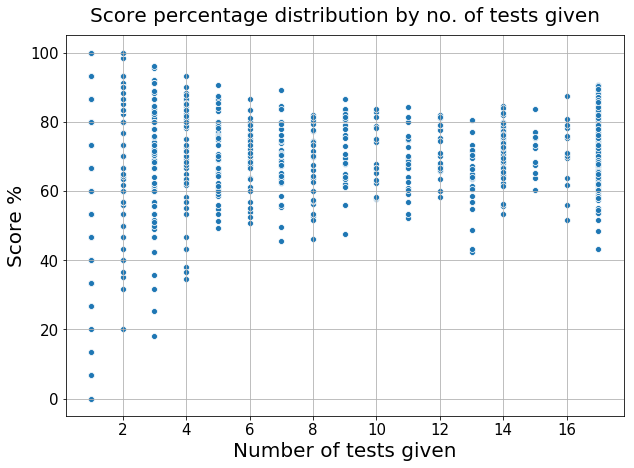

In [15]:
fig = plt.figure(figsize=(10,7))
participant = test_scores.groupby(['Participant identifier','Track','Designation']).agg({'Test Name':'size', 'Score':'sum',
                                                                               'maximum_score':'sum'}).reset_index()
participant['Percent'] =  round((participant['Score']/participant['maximum_score'])*100,2)
sns.scatterplot(x="Test Name", y="Percent", data=participant)
plt.xlabel('Number of tests given', fontsize=20)
plt.ylabel('Score %',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.grid()
plt.title("Score percentage distribution by no. of tests given", fontsize=20, x=0.5,y=1.02)
#plb.savefig('Sacatter_TestvsScore',dpi=100,bbox_inches='tight')
